# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Описание данных

Файл **_/datasets/hypothesis.csv_**

* _Hypothesis_ — краткое описание гипотезы;
* _Reach_ — охват пользователей по 10-балльной шкале;
* _Impact_ — влияние на пользователей по 10-балльной шкале;
* _Confidence_ — уверенность в гипотезе по 10-балльной шкале;
* _Efforts_ — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл **_/datasets/orders.csv_**

* _transactionId_ — идентификатор заказа;
* _visitorId_ — идентификатор пользователя, совершившего заказ;
* _date_ — дата, когда был совершён заказ;
* _revenue_ — выручка заказа;
* _group_ — группа A/B-теста, в которую попал заказ.

Файл **_/datasets/visitors.csv_**

* _date_ — дата;
* _group_ — группа A/B-теста;
* _visitors_ — количество пользователей в указанную дату в указанной группе A/B-теста

# Содержание

[Часть 1. Приоритизация гипотез.](#Часть-1.-Приоритизация-гипотез.)

[Часть 2. Анализ A/B-теста](#Часть-2.-Анализ-A/B-теста)

[Итоговый вывод](#Итоговый-вывод)

# Часть 1. Приоритизация гипотез.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
# открываем файл
hypothesis_data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis_data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis_data.columns = hypothesis_data.columns.str.lower().str.replace(' ','_')

In [5]:
hypothesis_data['ICE'] = (hypothesis_data['impact'] * hypothesis_data['confidence']) / hypothesis_data['efforts']

hypothesis_data['RICE'] = ((hypothesis_data['reach'] * hypothesis_data['impact'] *
                            hypothesis_data['confidence']) / hypothesis_data['efforts'])

In [6]:
pd.set_option('display.max_colwidth', -1)
print(hypothesis_data.sort_values(by = 'ICE', ascending = False).loc[:, ['hypothesis', 'ICE']])

                                                                                                     hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр

In [7]:
print(hypothesis_data.sort_values(by = 'RICE', ascending = False).loc[:, ['hypothesis', 'RICE']])

                                                                                                     hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

При использовании фреймворка **ICE** наиболее актуальными для А/В-теста были следующие гипотезы:
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

При использовании фреймворка **RICE** наиболее актуальными для А/В-теста стали следующие гипотезы:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Это произошло из-за параметра **reach**, применяемого в фреймворке _RICE_ и отвечающего за охват пользователей, которых затронет А/В-тест, данный показатель неваловажен при выборе гипотезы для проведения теста. 

# Часть 2. Анализ A/B-теста

In [8]:
# открываем файлы

orders_data = pd.read_csv('/datasets/orders.csv')

visitors_data = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders_data

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
visitors_data

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
# проверим пропуски в датасете orders_data
orders_data.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
# проверим пропуски в датасете visitors_data
visitors_data.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [13]:
# проверим дубликаты в датасете orders_data
orders_data.duplicated().sum()

0

In [14]:
# проверим дубликаты в датасете visitors_data
visitors_data.duplicated().sum()

0

В датасетах visitors_data и orders_data **отсутствуют пропуски** в столбцах, а также **дубликаты**.

In [15]:
# проверим не пересекаются ли пользователи группы А И В

orders_data.groupby('visitorId').agg({'group':'nunique'}).reset_index().query('group > 1')['visitorId'].count()

58

Проверка на то, если ли посетители одновременно в группе А и В показала что таких посетителей - 58 человек. Однако безболезненно удалить мы их не можем, т. к. данные пользователи имеются и в датафрейме с визитами, поэтому примем данный факт ко вниманию. Причиной их появления может служить, как тестирование системы сплитования, так и ошибка в системе сплитования. Стоит сообщить об этом разработчикам системы сплитования, что бы они проверили у себя возможность появления данной ошибки.

In [16]:
orders_data['date'] = orders_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors_data['date'] = visitors_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
# создаем массив уникальных дат и групп:
datesGroups = orders_data[['date', 'group']].drop_duplicates()

# найдём агрегированные кумулятивные данные о заказах по дням
ordersAggregated = datesGroups.apply(lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'],
                                    orders_data['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',
                                    'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique,
                                    'revenue' : 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

# найдём агрегированные кумулятивные данные о посетителях по дням
visitorsAggregated = datesGroups.apply(lambda x: visitors_data[np.logical_and(visitors_data['date'] <= x['date'],
                                    visitors_data['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',
                                    'visitors' : 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

# объединяем кумулятивные данные в одну таблицу
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


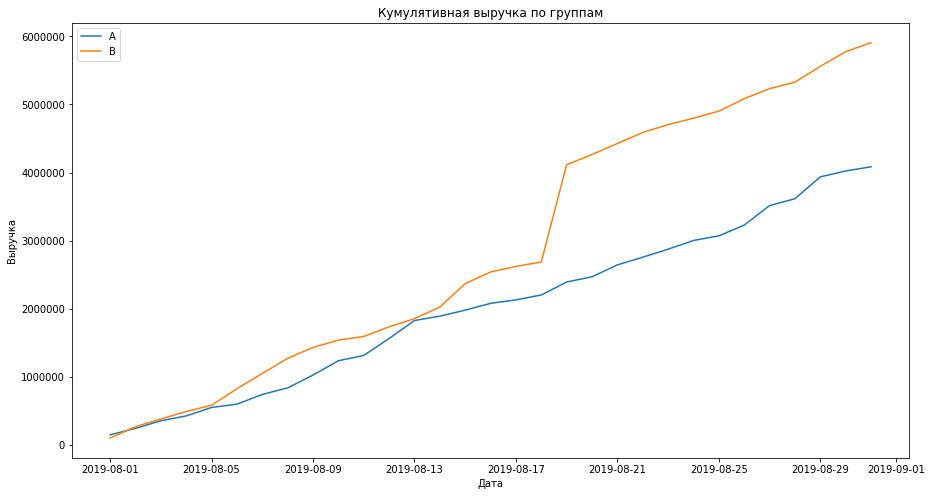

In [18]:
# датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# строим график кумулятивной выручки
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Выручка на обоих графиках растёт практически равномерно до середины времени проведения А/В-теста, однако во второй половине А/В-теста наблюдается резкий скачёк выручки для **группы В**. Это может быть связано с различными причинами, такими как всплеск числа заказов или крупными (на большую сумму) покупками.

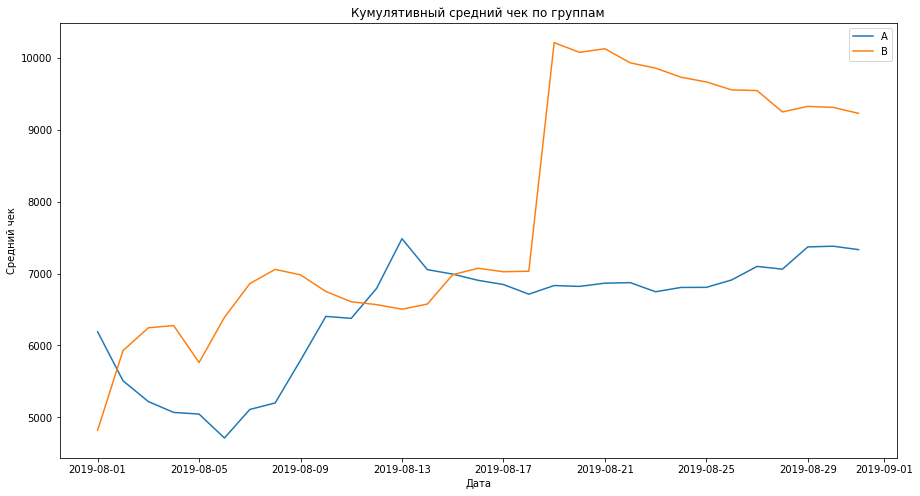

In [19]:
# строим график среднего чека по группам
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = 'B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Колебания в начале графика связаны с малым числом данных, во второй половине времени проведения А/В-теста кривые начали выпрямляться, на данном графике так же можно отметить более высокое значение среднего чека для **группы В**.

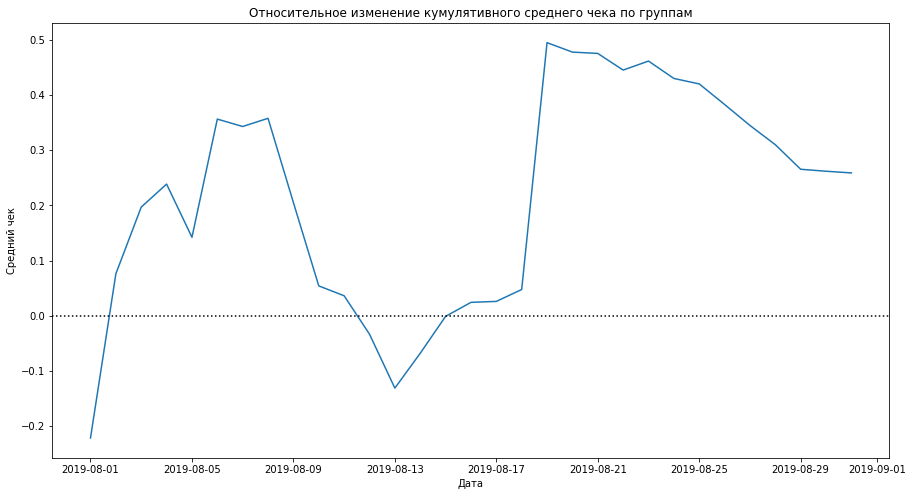

In [20]:
# строим график относительного изменения кумулятивного среднего чека по группам
# объединим данные в один датафрейм

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date',
                                                  how = 'left', suffixes = ['A', 'B'])
plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
        (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
plt.title('Относительное изменение кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.axhline(y = 0, color = 'black', linestyle = 'dotted') 
plt.show()

В нескольких точках графика есть резкие скачки, что говорит о крупных заказах и выбросах.

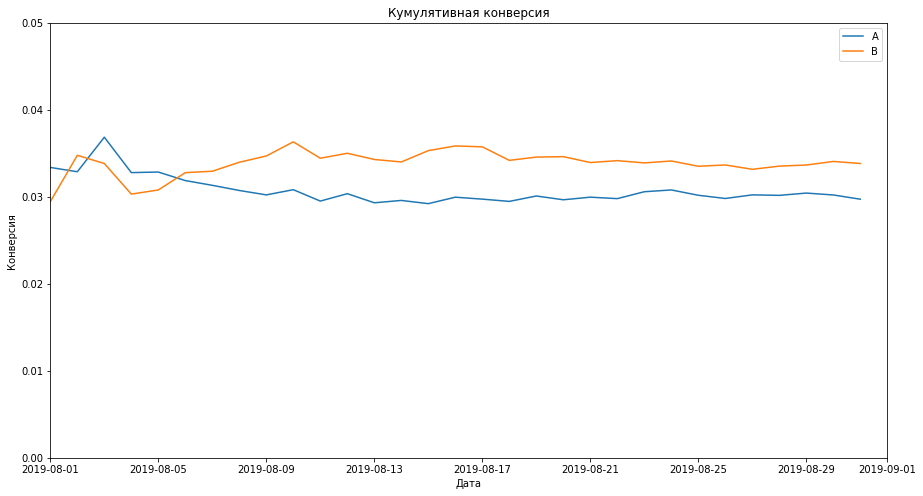

In [21]:
# найдём кумулятивную конверсию

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# разделим данные на группы
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(15,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]) 
plt.show()

Сначала конверсия колебалась, но потом выровнялась, на графике отчётливо видно, что конверсия **группы В** стабильно выше конверсии _группы А_

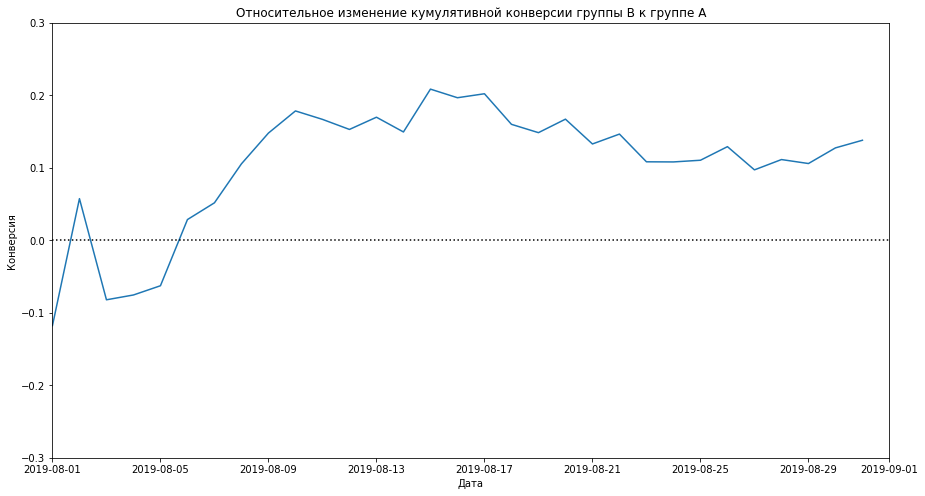

In [22]:
# gостроим график относительного различия кумулятивных конверсий

mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']],
                                                left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / 
         mergedCumulativeConversions['conversionA'] - 1)
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axhline(y = 0, color = 'black', linestyle = 'dotted')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3]) 
plt.show()

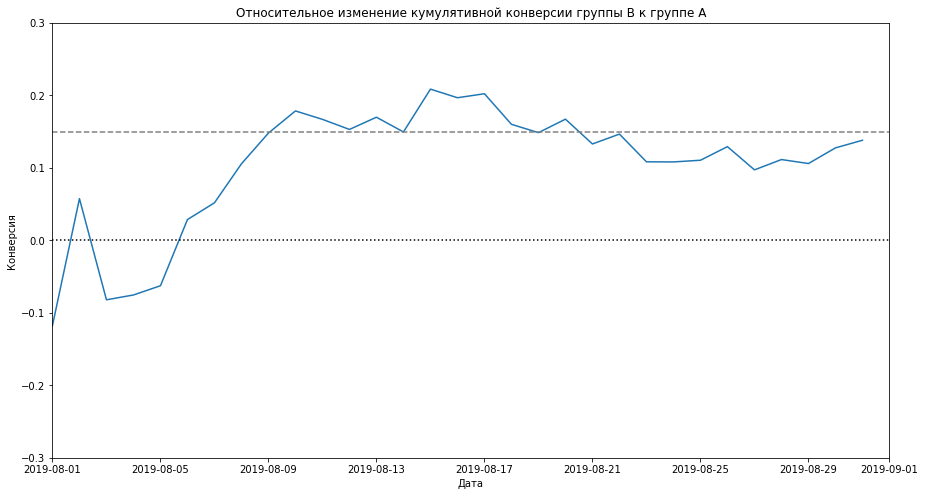

In [23]:
plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / 
         mergedCumulativeConversions['conversionA'] - 1)
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axhline(y = 0, color = 'black', linestyle = 'dotted')
plt.axhline(y = 0.15, color = 'grey', linestyle = '--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3])
plt.show()

**Группа В** почти с самого начала теста лидирует по конверсии, что можно заметить и на этом графике, конверсия колеблется около прироста в **15%** относительно _группы А_.

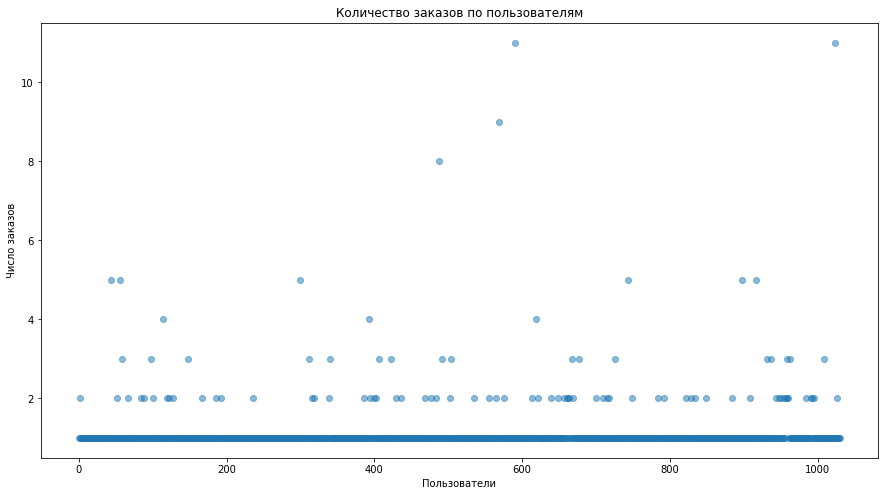

In [24]:
# подсчитаем количество заказов по пользователям

ordersByUsers = orders_data.drop(['date', 'revenue', 'group'], axis = 1).groupby('visitorId', as_index = False).agg({
    'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,8))
plt.scatter(x_values, ordersByUsers['orders'], alpha = .5)
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')
plt.show()

Большинство покупателей совершали только один заказ, однако доля покупателей с 2 - 5 заказами тоже значительная, но при этом их точная доля не ясна — непонятно, считать их аномалиями или нет.

In [25]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print('95-й и 99-й перцентили:', np.percentile(ordersByUsers['orders'], [95, 99]))

95-й и 99-й перцентили: [2. 4.]


Не более _5%_ пользователей оформляли **больше 2 заказов**, исходя из этого разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

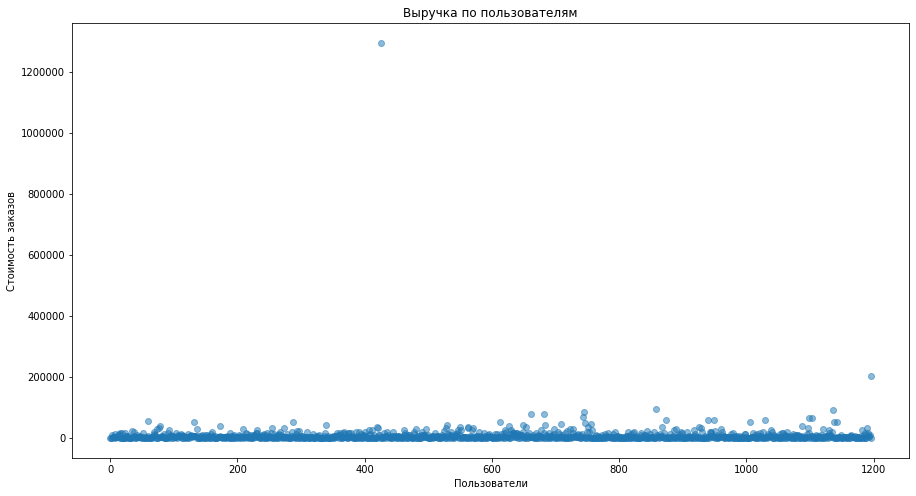

In [26]:
# построим точечный график стоимости заказов

x_values = pd.Series(range(0,len(orders_data['revenue'])))

plt.figure(figsize=(15,8))
plt.scatter(x_values, orders_data['revenue'], alpha = .5)
plt.title('Выручка по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

Исходя из графика можно сделать вывод что есть два заказа которые _очень_ сильно выделяются по выручке на фоне остальных, и ряд заказов, которые не так сильно, но тем неменее также выделяются на общем фоне, но при этом их точная доля не ясна.

In [27]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print('95-й и 99-й перцентили:', np.percentile(orders_data['revenue'], [95, 99]))

95-й и 99-й перцентили: [28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рублей, исходя из этого разумно выбрать **30 000 рублей** за нижнюю границу стоимости заказа, и отсеять аномальных заказы по этому значению.

Провериим гипотезу о том, что конверсия по «сырым» данным между группами А и В различается.

**H0:** _конверсия_ между группами А и В в исходных данных **НЕ различается**

**H1:** _конверсия_ между группами А и В в исходных данных **различается**

In [28]:
# найдём статистическую значимость различий в конверсии между группами по "сырым" данным

visitorsADaily = visitors_data[visitors_data['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({
    'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis = 1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors_data[visitors_data['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({
    'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis = 1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders_data[orders_data['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
                'date', as_index = False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({
    'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}), axis = 1).sort_values(by = ['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders_data[orders_data['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
                'date', as_index = False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({
    'date' : 'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB' : 'sum'}), axis = 1).sort_values(by = ['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

result_data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

ordersByUsersA = orders_data[orders_data['group'] == 'A'].groupby('visitorId', as_index = False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders_data[orders_data['group'] == 'B'].groupby('visitorId', as_index = False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(
                result_data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(
                result_data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

print('Статистическая значимость различий в конверсии между группами А и В: {0:.3f}'.format(
    stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы В к группе А: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Статистическая значимость различий в конверсии между группами А и В: 0.008
Относительный прирост конверсии группы В к группе А: 0.138


По исходным данным обнаруживаем, что _различия в конверсии групп A и B_ **есть**, т. к. p-value меньше 0.05. Т. е. нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы В к группе А равен 13.8%.

Провериим гипотезу о том, что средний чек по «сырым» данным между группами А и В различается.

**H0:** _средний чек_ в группах А и В по исходным данным **НЕ различается**

**H1:** _средний чек_ в группах А и В по исходным данным **различается**

In [29]:
# относительные различия в среднем чеке между группами:

print('Относительные различия в среднем чеке между группами А и В: {0:.3f}'.format(
    stats.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], 
                       orders_data[orders_data['group']=='B']['revenue'])[1]))

print('Относительное различие среднего чека между группами А и В: {0:.3f}'.format(
    orders_data[orders_data['group']=='B']['revenue'].mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1)) 

Относительные различия в среднем чеке между группами А и В: 0.365
Относительное различие среднего чека между группами А и В: 0.259


_Статистически значимых отличий_ в среднем чеке между группами **нет**, т. к. p-value больше 0.05. Однако относительное различие среднего чека между группами 25.9%

Провериим гипотезу о том, что конверсия по «очищенным» данным между группами А и В различается.

**H0:** _конверсия_ между группами А и В в «очищенных» данных **НЕ различается**

**H1:** _конверсия_ между группами А и В в «очищенных» данных **различается**

In [30]:
# найдём статистическую значимость различий в конверсии между группами по очищенным данным
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)

usersWithExpensiveOrders = orders_data[orders_data['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index = np.arange(result_data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')], axis = 0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index = np.arange(result_data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')], axis = 0)

In [31]:
print('Статистическая значимость различий в конверсии между очищеными группами А и В: {0:.3f}'.format(
    stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии очищенных группы В к группе А: {0:.3f}'.format(
    sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Статистическая значимость различий в конверсии между очищеными группами А и В: 0.007
Относительный прирост конверсии очищенных группы В к группе А: 0.172


По очищенным данным подтверждается, что _различия в конверсии групп A и B_ **есть**, т. к. p-value меньше 0.05. Т. е. нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. _Относительный прирост конверсии группы В к группе А_ вырос по сравнению с неочищенными ранными, и равен - **17.2%**, против 13.8% в исходных данных.

Провериим гипотезу о том, что средний чек по «очищенным» данным между группами А и В различается.

**H0:** _средний чек_ в группах А и В по «очищенным» данным **НЕ различается**

**H1:** _средний чек_ в группах А и В по «очищенным» данным **различается**

In [32]:
print('Относительные различия в среднем чеке между очищенными группами А и В: {0:.3f}'.format(
                stats.mannwhitneyu(orders_data[np.logical_and(orders_data['group'] == 'A', 
                np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'], orders_data[
                np.logical_and(orders_data['group'] == 'B', np.logical_not(orders_data['visitorId'].isin(abnormalUsers)),
                )]['revenue'])[1]))

print('Относительное различие среднего чека между очищенными группами А и В: {0:.3f}'.format(
        orders_data[np.logical_and(orders_data['group'] == 'B', np.logical_not(orders_data['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean() / orders_data[np.logical_and(orders_data['group'] == 'A', np.logical_not(
            orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

Относительные различия в среднем чеке между очищенными группами А и В: 0.360
Относительное различие среднего чека между очищенными группами А и В: -0.023


_Статистически значимых отличий_ в среднем чеке между группами **нет**, т. к. p-value больше 0.05. Однако относительное различие среднего чека между группами переменилось в другую сторону, в пользу **группы А** - 2.3%, это произошло из-за выбросов.

# Итоговый вывод

В начале исследования было два датасета с данными о проведении А/В-теста. Датасеты visitors_data и orders_data не содержат пропуски в столбцах, а также дубликаты.

Проверка на то, если ли посетители одновременно в группе А и В показала что таких посетителей - 58 человек. Однако безболезненно удалить мы их не можем, т. к. данные пользователи имеются и в датафрейме с визитами, поэтому примем данный факт ко вниманию. Причиной их появления может служить, как тестирование системы сплитования, так и ошибка в системе сплитования. Стоит сообщить об этом разработчикам системы сплитования, что бы они проверили у себя возможность появления данной ошибки.

Кумулятивная выручка в «сырых» данных на обоих графиках растёт практически равномерно до середины времени проведения А/В-теста, однако во второй половине А/В-теста наблюдается резкий скачёк выручки для группы В. Это может быть связано с различными причинами, такими как всплеск числа заказов или крупными (на большую сумму) покупками.

Колебания кумулятивного среднего чека в «сырых» данных в начале графика связаны с малым числом данных, во второй половине времени проведения А/В-теста кривые начали выпрямляться, на данном графике так же можно отметить более высокое значение среднего чека для группы В.

В нескольких точках графика относительного изменениея кумулятивного среднего чека есть резкие скачки, что говорит о крупных заказах и выбросах.

Как следует из графика сначала конверсия колебалась, но потом выровнялась, на графике отчётливо видно, что конверсия группы В стабильно выше конверсии группы А

Относительное изменение кумулятивной конверсии группы В к группе А. Группа В почти с самого начала теста лидирует по конверсии, что можно заметить и на этом графике, конверсия колеблется около прироста в 15% относительно группы А.

Количество заказов по пользователям. Большинство покупателей совершали только один заказ, однако доля покупателей с 2 - 5 заказами тоже значительная, но при этом их точная доля не ясна — непонятно, считать их аномалиями или нет.

Не более 5% пользователей оформляли больше 2 заказов, исходя из этого разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рублей, исходя из этого разумно выбрать 30 000 рублей за нижнюю границу стоимости заказа, и отсеять аномальных заказы по этому значению.

По исходным данным обнаруживаем, что различия в конверсии групп A и B есть, т. к. p-value меньше 0.05. Т. е. нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы В к группе А равен 13.8%.

Статистически значимых отличий в среднем чеке между группами нет, т. к. p-value больше 0.05. Однако относительное различие среднего чека между группами 25.9%

По очищенным данным подтверждается, что различия в конверсии групп A и B есть, т. к. p-value меньше 0.05. Т. е. нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы В к группе А вырос по сравнению с неочищенными ранными, и равен - 17.2%, против 13.8% в исходных данных.

Статистически значимых отличий в среднем чеке между группами нет, т. к. p-value больше 0.05. Однако относительное различие среднего чека между группами переменилось в другую сторону, в пользу группы А - 2.3%, это произошло из-за выбросов.

**ИТОГ**

В результате проведённого исследования, можно сделать вывод, что **есть** _статистически значимое различие по конверсии между группами_ как в «сырых», так и в «очищенных» данных. _Статистически значимого различия по среднему чеку_ между группами **нет**, ни по «сырым», ни по «очищенным» данным. Также стоит обратить внимание, что после очистки данных, хоть конверсия у группы В относительно группы А выросла, **однако** средний чек _наоборот снизился_ в сторону «превосходства» группы А. Исходя из полученных данных, **тест следует остановить и зафиксировать отсутствие различий между группами.**